# Australian Open 2020: Winner Predictor
## Web Intelligence Course, Ca' Foscari University, A.Y. 2019/2020
#### Diego Chinellato, 867637 - Giorgia Campardo, 867928

In [1]:
%matplotlib inline

# libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# our modules
from preprocessing import *
from models import *
from reports import *

In [2]:
full_dataset = pd.read_csv('data/dataset.csv', 
                            encoding='utf-8-sig', 
                            dtype=DATA_TYPES,
                            parse_dates=['Date', 'WBD', 'LBD'])
print('Baseline ("stupid") models, or the lower bound on accuracy that we wish to improve upon.')
baseline_model(full_dataset)

Baseline ("stupid") models, or the lower bound on accuracy that we wish to improve upon.
Player with higher rank wins. Accuracy: 0.34
Player with higher avg bet wins. Accuracy: 0.3
Player with combined bet (B365+PS+Max+Avg) wins. Accuracy: 0.3


In [3]:
full_dataset.head()

,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,...,WElo,WSurfElo,WBD,WHand,WBHand,LElo,LSurfElo,LBD,LHand,LBHand
0,1,Brisbane,Brisbane International,2011-01-02,ATP250,Outdoor,Hard,1st Round,3,Lopez F.,...,1783.4,1724.7,NaT,NaN,NaN,NaN,NaN,1984-03-24,R,1.0
1,1,Brisbane,Brisbane International,2011-01-02,ATP250,Outdoor,Hard,1st Round,3,Istomin D.,...,1610.9,1611.0,1986-07-09,R,2.0,NaN,NaN,1974-05-05,L,2.0
2,3,Doha,Qatar Exxon Mobil Open,2011-01-03,ATP250,Outdoor,Hard,1st Round,3,Bubka S.,...,NaN,NaN,1987-10-02,R,2.0,NaN,NaN,1985-07-08,R,2.0
3,3,Doha,Qatar Exxon Mobil Open,2011-01-03,ATP250,Outdoor,Hard,1st Round,3,Marchenko I.,...,1574.9,1561.4,1987-08-09,R,2.0,1597.1,1563.8,1987-08-22,L,2.0
4,3,Doha,Qatar Exxon Mobil Open,2011-01-03,ATP250,Outdoor,Hard,1st Round,3,Davydenko N.,...,NaN,NaN,1981-02-06,R,2.0,1891.2,1829.0,1987-05-24,R,2.0


In [4]:
full_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23661 entries, 0 to 23660
Data columns (total 52 columns):
ATP           23661 non-null int32
Location      23661 non-null object
Tournament    23661 non-null object
Date          23661 non-null datetime64[ns]
Series        23661 non-null object
Court         23661 non-null object
Surface       23661 non-null object
Round         23661 non-null object
Best of       23661 non-null int32
Winner        23661 non-null object
Loser         23661 non-null object
WRank         23651 non-null float64
LRank         23613 non-null float64
WPts          23653 non-null float64
LPts          23614 non-null float64
W1            23510 non-null float64
L1            23512 non-null float64
W2            23287 non-null float64
L2            23287 non-null float64
W3            11182 non-null float64
L3            11182 non-null float64
W4            2200 non-null float64
L4            2200 non-null float64
W5            816 non-null float64
L5          

In [5]:
full_dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
ATP,23661.0,33.000338,18.062346,1.000,19.00,33.00,49.00,67.00
Best of,23661.0,3.385698,0.789088,3.000,3.00,3.00,3.00,5.00
WRank,23651.0,56.759545,70.918246,1.000,16.00,40.00,74.00,1890.00
LRank,23613.0,87.169949,109.152555,1.000,34.00,62.00,100.00,2159.00
WPts,23653.0,1987.728111,2476.799826,1.000,693.00,1060.00,2030.00,16950.00
LPts,23614.0,1127.380918,1293.454647,1.000,557.00,789.00,1195.00,16950.00
W1,23510.0,5.806635,1.225256,0.000,6.00,6.00,6.00,7.00
L1,23512.0,4.105095,1.834727,0.000,3.00,4.00,6.00,7.00
W2,23287.0,5.783828,1.245964,0.000,6.00,6.00,6.00,7.00
L2,23287.0,3.952205,1.857315,0.000,3.00,4.00,6.00,7.00


In [6]:
features_to_drop = []
features_to_add = []
labels = 'duplicate'
X_train, Y_train = preprocess_data(max_date = 2017,
                                   features_to_drop=features_to_drop,
                                   features_to_add=features_to_add,
                                   labels=labels)
X_valid, Y_valid = preprocess_data(min_date = 2018, 
                                   max_date = 2018, 
                                   features_to_drop = features_to_drop, 
                                   features_to_add=features_to_add,
                                   labels = labels)
X_test, Y_test = preprocess_data(min_date = 2019, 
                                 max_date = 2019, 
                                 features_to_drop = features_to_drop, 
                                 features_to_add=features_to_add,
                                 labels = labels)

In [7]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25842 entries, 0 to 25842
Data columns (total 20 columns):
Series            25842 non-null int64
Court             25842 non-null int64
Round             25842 non-null int64
Best of           25842 non-null int32
WRank             25842 non-null int32
LRank             25842 non-null int32
WPts              25842 non-null float64
LPts              25842 non-null float64
WHand             25842 non-null int64
WBHand            25842 non-null int32
LHand             25842 non-null int64
LBHand            25842 non-null int32
WEloCalc          25842 non-null float64
LEloCalc          25842 non-null float64
ProbaElo          25842 non-null float64
Surface__Clay     25842 non-null uint8
Surface__Grass    25842 non-null uint8
Surface__Hard     25842 non-null uint8
RankDiff          25842 non-null int32
PtsDiff           25842 non-null int32
dtypes: float64(5), int32(7), int64(5), uint8(3)
memory usage: 2.9 MB


In [8]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Series,25842.0,1.418389,1.507439,0.000000,0.000000,1.000000,2.000000,4.000000
Court,25842.0,0.183577,0.387146,0.000000,0.000000,0.000000,0.000000,1.000000
Round,25842.0,1.553982,2.084114,0.000000,0.000000,1.000000,2.000000,7.000000
Best of,25842.0,3.394242,0.795664,3.000000,3.000000,3.000000,3.000000,5.000000
WRank,25842.0,67.909875,91.761856,1.000000,21.000000,47.000000,84.000000,2259.000000
LRank,25842.0,67.909875,91.761856,1.000000,21.000000,47.000000,84.000000,2259.000000
WPts,25842.0,1734.140276,2315.146417,1.000000,627.000000,923.000000,1675.000000,16950.000000
LPts,25842.0,1734.140276,2315.146417,1.000000,627.000000,923.000000,1675.000000,16950.000000
WHand,25842.0,0.134316,0.340998,0.000000,0.000000,0.000000,0.000000,1.000000
WBHand,25842.0,1.760351,0.426877,1.000000,2.000000,2.000000,2.000000,2.000000


Models construction

Max accuracy (validation, training): (0.655, 0.719)
Criterion: entropy
Splitter: random
Max depth: 30
Max leaves: 130
Execution took 2.67 min


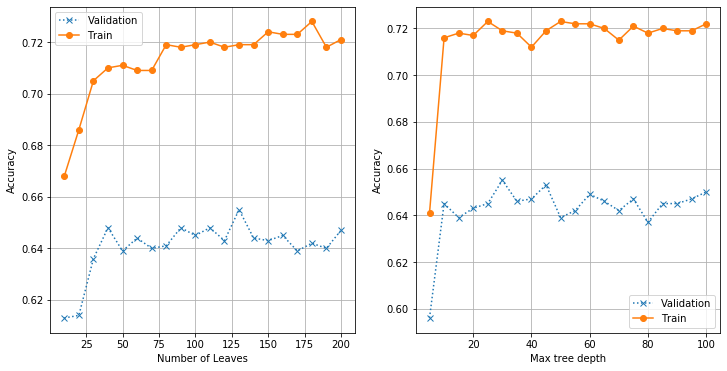

In [9]:
dt = build_decision_tree(X_train, Y_train, X_valid, Y_valid)

Max accuracy (validation, training): (0.656, 0.895)
Boostrap: False
N. estimators: 130
Max samples: 0.25
Tree criterion: gini
Execution took 21.89 min


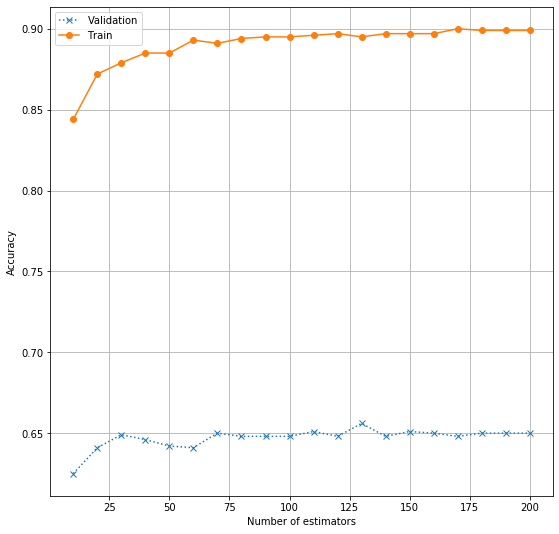

In [10]:
bagged_dt = build_bagging_classifier(X_train, Y_train, X_valid, Y_valid)

Max accuracy (validation, training): (0.606, 1.0)
N. estimators: 50
Learning rate: 0.5
Tree criterion: gini
Execution took 0.59 min


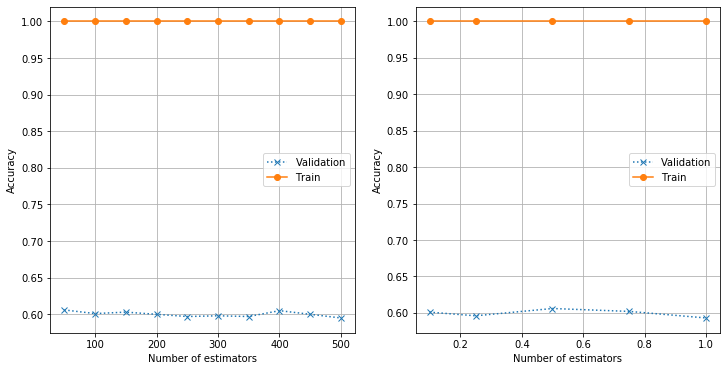

In [11]:
boosted_dt = build_adaboost(X_train, Y_train, X_valid, Y_valid)

Max accuracy (validation, training): (0.656, 0.957)
N. estimators: 100
Criterion: gini
Bootstrap: False
Features criterion (None means all features): log2
Max tree depth: 15
Execution took 13.13 min


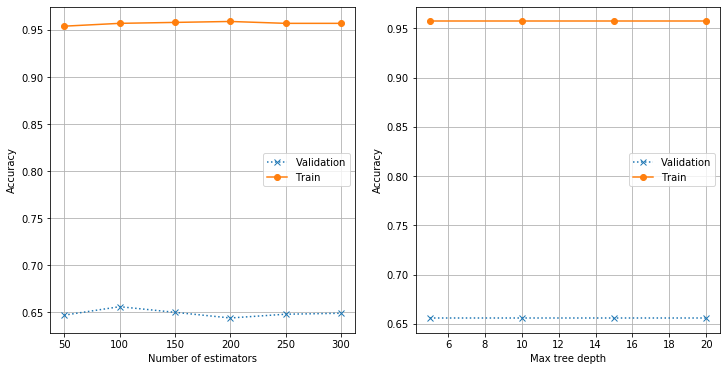

In [12]:
rf = build_random_forest(X_train, Y_train, X_valid, Y_valid)

In [13]:
models = [('Decision tree', dt), 
          ('Bagging', bagged_dt),
          ('AdaBoost', boosted_dt),
          ('Random Forest', rf)]

Approximate decision boundaries for the different models


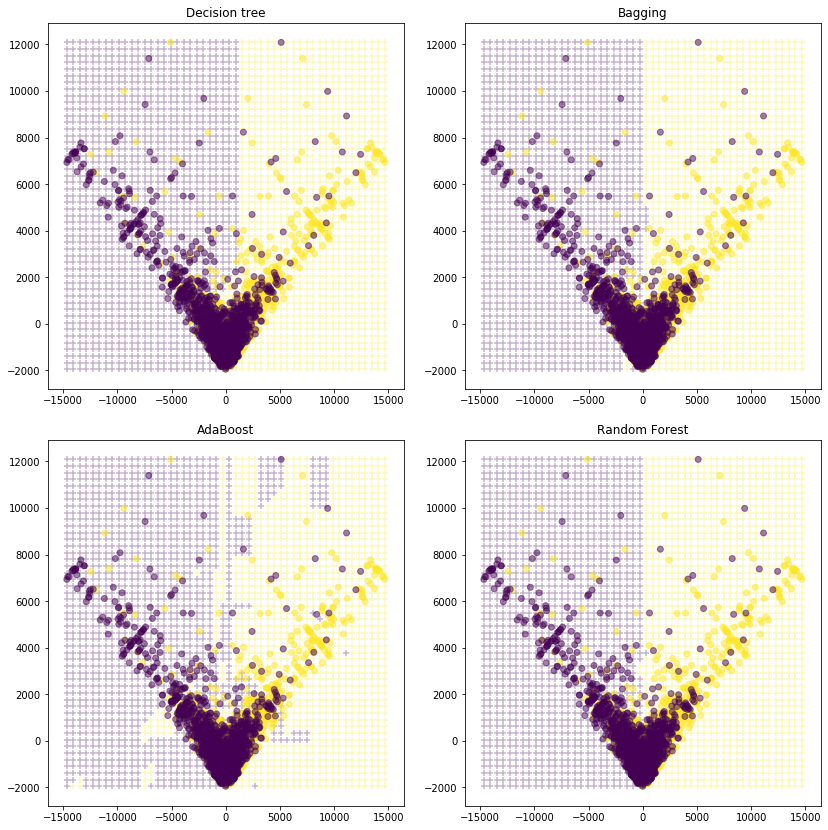

In [18]:
model_decision_boundary(models, X_test, Y_test)

Features importance, Random Forest
{'Series': 0.015, 'Court': 0.006, 'Round': 0.019, 'Best of': 0.006, 'WRank': 0.066, 'LRank': 0.065, 'WPts': 0.081, 'LPts': 0.08, 'WHand': 0.006, 'WBHand': 0.007, 'LHand': 0.006, 'LBHand': 0.007, 'WEloCalc': 0.093, 'LEloCalc': 0.092, 'ProbaElo': 0.171, 'Surface__Clay': 0.007, 'Surface__Grass': 0.005, 'Surface__Hard': 0.007, 'RankDiff': 0.131, 'PtsDiff': 0.131}


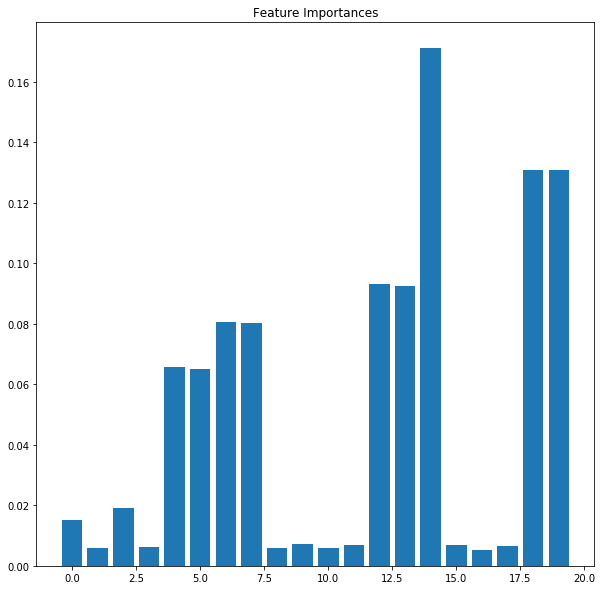

In [20]:
print('Features importance, Random Forest')
feature_importance(X_train, rf)

Features importance, Bagging Classifier
{'Series': 0.021, 'Court': 0.01, 'Round': 0.025, 'Best of': 0.004, 'WRank': 0.039, 'LRank': 0.047, 'WPts': 0.057, 'LPts': 0.059, 'WHand': 0.009, 'WBHand': 0.01, 'LHand': 0.009, 'LBHand': 0.008, 'WEloCalc': 0.105, 'LEloCalc': 0.104, 'ProbaElo': 0.185, 'Surface__Clay': 0.01, 'Surface__Grass': 0.007, 'Surface__Hard': 0.009, 'RankDiff': 0.047, 'PtsDiff': 0.237}


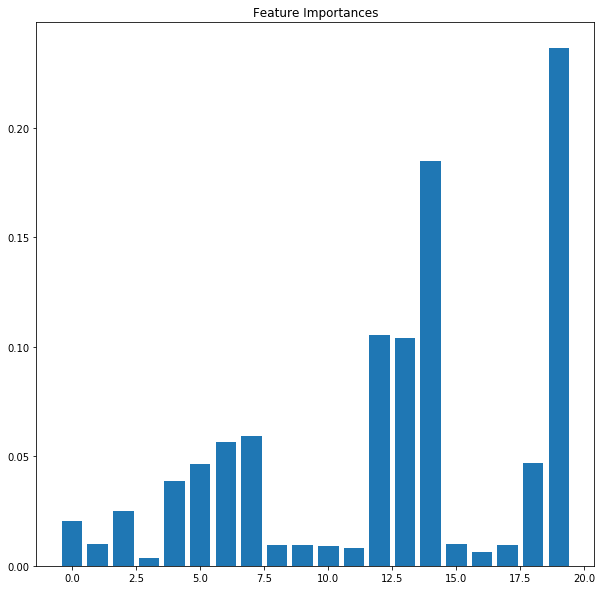

In [21]:
print('Features importance, Bagging Classifier')
feature_importance(X_train, boosted_dt)

Features importance, Decision Tree
{'Series': 0.005, 'Court': 0.001, 'Round': 0.004, 'Best of': 0.016, 'WRank': 0.006, 'LRank': 0.014, 'WPts': 0.196, 'LPts': 0.212, 'WHand': 0.003, 'WBHand': 0.002, 'LHand': 0.002, 'LBHand': 0.001, 'WEloCalc': 0.039, 'LEloCalc': 0.017, 'ProbaElo': 0.324, 'Surface__Clay': 0.003, 'Surface__Grass': 0.001, 'Surface__Hard': 0.002, 'RankDiff': 0.021, 'PtsDiff': 0.131}


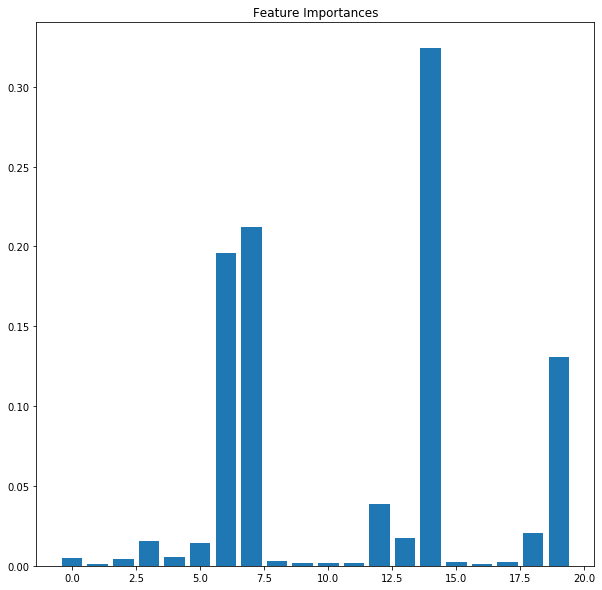

In [22]:
print('Features importance, Decision Tree')
feature_importance(X_train, dt)

In [23]:
report(X_test, Y_test, models)

Algorithm: Decision tree
              precision    recall  f1-score   support

           0       0.64      0.67      0.66      2024
           1       0.65      0.63      0.64      2024

    accuracy                           0.65      4048
   macro avg       0.65      0.65      0.65      4048
weighted avg       0.65      0.65      0.65      4048


Algorithm: Bagging
              precision    recall  f1-score   support

           0       0.65      0.65      0.65      2024
           1       0.65      0.64      0.65      2024

    accuracy                           0.65      4048
   macro avg       0.65      0.65      0.65      4048
weighted avg       0.65      0.65      0.65      4048


Algorithm: AdaBoost
              precision    recall  f1-score   support

           0       0.59      0.59      0.59      2024
           1       0.59      0.60      0.60      2024

    accuracy                           0.59      4048
   macro avg       0.59      0.59      0.59      4048
weighted